# Проект: Исследование стартапов

## Введение

- **Цель проекта:** описать рынок стартап-финансирования, выделить типичные объёмы инвестиций, рисковые и премиальные категории, а также связь между жизненным циклом компании и числом раундов.

- **Описание данных:**
    - Таблица acquisition cодержит информацию о покупках одними компаниями других компаний:
        - id — идентификатор покупки.
        - acquiring_company_id — идентификатор покупающей компании.
        - acquired_company_id — идентификатор покупаемой компании.
        - term_code — варианты расчёта.
        - price_amount — сумма сделки.
        - acquired_at — дата сделки.
    - Таблица company_and_rounds cодержит информацию о компаниях и раундах финансирования:
        - company ID — идентификатор компании.
        - name — название компании.
        - category code — категория области деятельности компании.
        - status — статус компании.
        - founded at — дата инвестирования.
        - closed at — дата закрытия компании.
        - domain — официальный сайт компании.
        - network username — ник компании в сети.
        - country code — код страны компании.
        - investment rounds — число инвестиционных раундов.
        - funding rounds — число раундов финансирования.
        - funding total — сумма финансирования.
        - milestones — вехи финансирования.
        - funding round id — идентификатор этапа финансирования.
        - company id — идентификатор компании.
        - funded at — дата финансирования.
        - funding round type — тип финансирования.
        - raised amount — сумма финансирования.
        - pre money valuation — предварительная денежная оценка.
        - participants — число участников.
        - is first round — является ли раунд первым.
        - is last round — является раунд последним.
    - Таблица education cодержит информацию об образовании сотрудника:
        - id — идентификатор записи об образовании.
        - person_id — идентификатор работника.
        - instituition — название учебного заведения.
        - graduated_at — дата получения образования.
    - Таблица people cодержит информацию о сотрудниках:
        - id — идентификатор сотрудника.
        - first_name — имя сотрудника.
        - last_name — фамилия сотрудника.
        - company_id — идентификатор компании.
        - network_username — ник в социальных сетях.
    - Таблица degrees cодержит информацию о типе образования сотрудника:
        - id — идентификатор записи.
        - object_id — идентификатор сотрудника.
        - degree_type — тип образования.
        - subject — специальность.

## Загрузка и предобработка данных

In [1]:
# Импортируем нужные для работы библиотеки
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
print(pd.__version__)

1.2.4


In [3]:
# Загружаем df_acquisition
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

# Познакомимся с данными в df_df_acquisition
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Посмотрим ощую информацию о df_acquisition
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
# Загружаем df_company_rounds
df_company_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

# Познакомимся с данными в df_df_acquisition
df_company_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Посмотрим ощую информацию о df_company_rounds
df_company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [7]:
# Загружаем df_people
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

# Познакомимся с данными в df_people
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
# Посмотрим ощую информацию о df_company_rounds
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [9]:
# Загружаем df_people
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

# Познакомимся с данными в df_people
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
# Посмотрим ощую информацию о df_people
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [11]:
# Загружаем df_degrees
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

# Познакомимся с данными в df_degrees
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
# Посмотрим ощую информацию о df_degrees
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [13]:
# Загружаем df_funds
df_funds = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

# Познакомимся с данными в df_funds
df_funds.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [14]:
# Посмотрим ощую информацию о df_degrees
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


- В следующих столбцах необходимо исправить тип данных или формат написания столбцов:
1. **В df_acquisition** 'term_code' следует заменить тип данных с **object на category** для более экономного формата написания, также в данном массиве следует заменить формат столбца 'acquired_at' на **timestamp**
2. В **df_company_rounds** в столбцах 'company  ID', 'category  code', 'founded  at', 'closed  at', 'country  code', 'funding  total', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'is  first  round', 'is  last  round' необходимо поменять названия: требуется заменить их на названия в формате snake_case 

In [15]:
# Для начала переименуем второй столбец company id, чтобы у нас не получилось два столбца с одинаковыми названиями
df_company_rounds = df_company_rounds.rename(columns = {'company  id' : 'company_id_rounds'})
df_company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company_id_rounds      52928 non-nul

In [16]:
# созданим функцию, которая позволит автоматизировать процесс именования столбцов
def rename_snake_case(df):
    column_names = df.columns.tolist()
    for column in column_names:
        count_spaces = 0
        
        # Приводим все симводы к нижему регистру и заменяем пробелы на '_'
        new_column = '_'.join(column.split()).lower()
        
        # Присваиваем изменения для названия столбцов
        df.rename(columns={column: new_column}, inplace = True)

In [17]:
rename_snake_case(df_company_rounds)
df_company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_rounds    52928 non-null   float64
 15  funded_at        

- Мы усспешно привели названия всех столбцов к корректному виду snake_case, а также переименовали второй столбец company id, чтобы не было дубликатов.

In [18]:
# Обработаем столбец 'object_id' и приведем его к корретному виду
df_degrees['object_id'] = (
    df_degrees['object_id']
    .str.split(':')
    .str[1]               
    .fillna('0')           
    .astype(int)           
    .replace(0, pd.NA)    
    .astype('Int64'))

# Посмотрим на полученный результат
df_degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


- Мы успешно загрузили данные, теперь можно начать предобработку дубликатов и пропусков. На данном этапе хочется обратить внимание на то, что в df_company_rounds, содердится большое количество пропусков среди столбуов, содержащих информацию о раундах финансирования. В дальнейшей потребуется провести работу по подготовке данного массива к анализу. 

### Смена типов и анализ пропусков

- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [19]:
# Замена столбца 'acquired_at', в котором содержалась информация о дате сделки

df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])

# Проверим замену
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [20]:
# Замена столбца 'acquired_at', в котором содержалась информация о дате сделки
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])

# Проверим замену
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [21]:
# Замена типов столбцов даты инвестирования и закрытия компании

df_company_rounds['founded_at'] = pd.to_datetime(df_company_rounds['founded_at'])
df_company_rounds['closed_at'] = pd.to_datetime(df_company_rounds['closed_at'])
df_company_rounds['funded_at'] = pd.to_datetime(df_company_rounds['funded_at'])

# Проверим замену
df_company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

- Мы провели работу с типами данных, осталось решить, **что делать с пропусками и дубликатами, если они есть.**

In [22]:
# Проверим явыне дубликаты
df_acquisition.duplicated().sum()

0

In [23]:
# Явных дубликатов не оказалось, так что теперь проверим неявные дубликаты 
df_acquisition.duplicated(subset = ['acquiring_company_id', 'acquired_company_id']).sum()

25

In [24]:
# Посмотрим на наши дубликаты
df_acquisition[df_acquisition.duplicated(subset=['acquiring_company_id', 'acquired_company_id'])]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1600,1875,317,2279,NaN,0,2008-08-24
2165,2481,317,13089,NaN,0,2008-10-22
2167,2484,59,10963,NaN,0,2008-09-12
2795,3157,45891,45891,cash,0,2008-11-10
3679,4115,61813,54654,NaN,0,2010-11-01
4644,5112,67952,67951,NaN,0,2011-02-03
4646,5114,67956,67955,NaN,0,2011-02-03
4647,5115,67956,67955,NaN,0,2011-02-03
4648,5116,67956,67955,NaN,0,2011-02-03
4689,5164,548,47671,NaN,10000000,2011-02-15


In [25]:
df_acquisition.isna().mean().round(2).sort_values(ascending=False)*100

term_code               81.0
id                       0.0
acquiring_company_id     0.0
acquired_company_id      0.0
price_amount             0.0
acquired_at              0.0
dtype: float64

- Большое количество пропусков в столбце 'term_code', где должны были быть указаны пропуски, могло быть связано с тем, что компании просто не указывали, каким способом они соверали покупку или они совершали таким образом, какого не было из предложенных враиантов.

In [26]:
# Проверим явыне дубликаты
df_company_rounds.duplicated().sum()

0

- Глубже затрагивать нефвные дубликаты сейчас я не стану, так как подробнее данный массив мы разберём позднее

In [27]:
df_company_rounds.isna().mean().round(2).sort_values(ascending=False)*100

closed_at              98.0
is_last_round          76.0
funded_at              76.0
is_first_round         76.0
participants           76.0
pre_money_valuation    76.0
raised_amount          76.0
funding_round_type     76.0
funding_round_id       76.0
company_id_rounds      76.0
network_username       56.0
founded_at             50.0
country_code           50.0
category_code          34.0
domain                 32.0
company_id              0.0
milestones              0.0
name                    0.0
funding_rounds          0.0
investment_rounds       0.0
status                  0.0
funding_total           0.0
dtype: float64

- Большое количество пропусков в столбцах, связанных со сделками, может быть связано с тем, что df_company_rounds был образован из двух таблиц, но об этом речь пойдёт позднее. 

In [28]:
# Количество явных дубликатов

df_people.duplicated().sum()

0

In [29]:
# Доля пропусков в столбцах

df_education.isna().mean().round(2).sort_values(ascending=False)*100

graduated_at    47.0
id               0.0
person_id        0.0
instituition     0.0
dtype: float64

- Почти половина строк (**47%**) не имеют записей в столбце о дата получения образования. Такое большое количество пропусков может говорить о том, что многие работники могут быть ещё студентами или вообще не иметь образования. Тот факт, что в столбце, где содержатся названия учебных заведений не содержится вообще ни одного пропуска говорит о том, что, скорее всего, в массиве много студентов.

In [30]:
# Количество явных дубликатов

df_people.duplicated().sum()

0

In [31]:
# Количество неявных дубликатов

df_people.duplicated(subset = 'id').sum()

1

In [32]:
# Доля пропусков в столбцах

df_people.isna().mean().round(2).sort_values(ascending=False)*100

company_id          85.0
network_username    83.0
id                   0.0
first_name           0.0
last_name            0.0
dtype: float64

- Пропуски содержатся в столбцах 'network_username' и 'company_id', что может быть связано с (1) *отсутсвием аккаунтов в социальных сетеях или тем, что данная информация просто не была указана пользователями* и тем фактом, что в настоящий момент большиноство зарегистрировавшихся не имеют места работы.
- **Лучше избавить от данных с пропусками в столбце company_id**, так как они не будут нести никакой пользы из-за того, что мы не можем установить, какой id не был подргужен, а какой просто отсутсвует.

In [33]:
# Количество неявных дубликатов

df_degrees.duplicated(subset = ['object_id', 'degree_type', 'subject']).sum()

1914

In [34]:
# Доля пропусков в столбцах

df_degrees.isna().mean().round(2).sort_values(ascending=False)*100

subject        26.0
degree_type    10.0
id              0.0
object_id       0.0
dtype: float64

- Пропуски содержатся в столбцах 'subject' и 'degree_type', что может быть связано с тем, что специалисты просто не имели высшего образования или не хотели указывать свою специализацию;
- С данными пропусками ничего не стоит делать: тех, кто не указал данные можно принимать за людей без образования.

- **Общий обзор полученной информации:**
    - company_rounds
        1. Высокие: company_round, first_round, money_valuation, funding_type, company_rounds — 70.8%.
        2. Средние: founded_at, category_code — 14.8%.
        3. Нулевые: status, company_id — 0%.
    - education
        1. Высокие: graduated_at — 47%.
        2. Нулевые: person_id, institution_id, degree_type — 0%.
    - people
        1. Высокие: company_id — 85%.
        2. Нулевые: first_name, last_name, network_username, type — 0%.
    - degrees
        1. Средние: subject — 26%.
        2. Нулевые: degree_type, object_id, type — 0%.

- **Предварительный вывод:** Данные достаточны для большинства задач (идентификаторы ~100% заполнены, объём ~40k+ строк после фильтра). Риски: систематические пропуски в раундах (70%) и связях (85%) — могут искажать анализ, поэтому задание выполнимо с обработкой (работа с дубликатами и пропусками); если >60% в ключевых столбцах — нужны дополнения.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [35]:
# Строим сводную таблицу
pivot = pd.pivot_table(
    data = df_company_rounds,
    values = ['raised_amount', 'funding_round_id'],
    index = df_company_rounds['funded_at'].dt.year,
    aggfunc = {
        'raised_amount' : 'median', # Находим медианное значение
        'funding_round_id' : 'count'
    }
)

# Переименовываем столбцы
pivot = pivot.rename(columns = {
    'raised_amount' : 'average_raised_amount',
    'funding_round_id' : 'total_rounds'
})

In [36]:
# Фильтруем результаты: оставляем только годы с >50 раундов
pivot = pivot[pivot['total_rounds'] > 50]

# Посмотрим, что получилось
pivot

,total_rounds,average_raised_amount
funded_at,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,96,3000000.0
2002.0,116,4200000.0
2003.0,159,3000000.0
2004.0,291,5000000.0
2005.0,1633,5500000.0
2006.0,2436,5000000.0
2007.0,3279,3973320.0


Text(0, 0.5, 'Количество раундов за год')

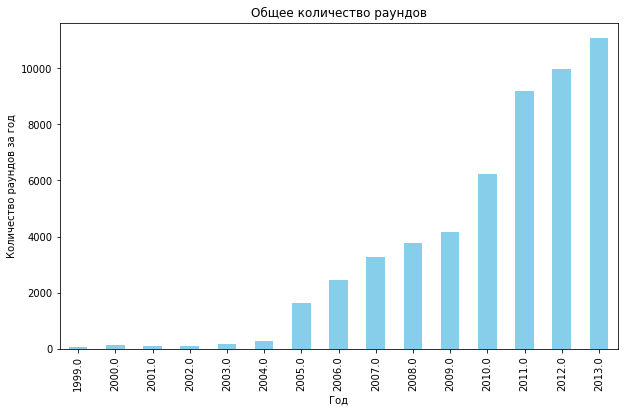

In [37]:
# Полотно:
plt.figure(figsize=(10, 6))

# Строим график
pivot['total_rounds'].plot(kind = 'bar', color = 'skyblue')

# Делаем заголовки: 
plt.title('Общее количество раундов')
plt.xlabel('Год')
plt.ylabel('Количество раундов за год')

Text(0, 0.5, 'Средняя сумма финансирования')

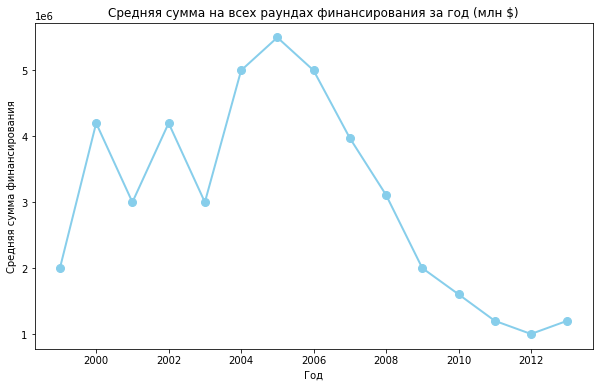

In [38]:
# Полотно:
plt.figure(figsize=(10, 6))

# Строим график:
pivot['average_raised_amount'].plot(
    kind = 'line',
    marker = 'o',
    linestyle = '-',
    linewidth = 2,
    markersize = 8,
    color = 'skyblue'
)

# Теперь задаём параметры для дизайна:
plt.title('Средняя сумма на всех раундах финансирования за год (млн $)')
plt.xlabel('Год')
plt.ylabel('Средняя сумма финансирования')

- **Общая динамика:** с 1999 по 2006 года наблюдался рост средней суммы финансирования, тогда была достигрут максимальный средний показатель в 5,5 млн, однако, после этого последовал спад, который замедлился к 2012 году, после которого среднее значение начало постепенно восстанавливаться;
- **Динамика до 2006 года:** как было отмечено ранее, до 2006 года наблюдается рост, однако, он сопровождался флуктуациями, которые могут быть связаны с вспеском новых цифровых стартапов, которые только начинали зарождаться (например, fasebook появился в 2004 году) и лопнувшим в тот же период "цифровым пузырём";
- **"Падение" после 2006:** хотя средняя сумма снижалсясь с 2006 по 2012 год, можно видеть, что общее количество раундов росло. Такая динамика может быть связана с изменением законодательства в данной сфере, а также экономическим кризисом 2008, из-за чего инвесторы давали меньше финансирования и было ужесточение инвестиционной политики, что и могло повлечь увеличение "дробления" раундов.


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [39]:
# Перед тем, как объеденить df_people и df_education необходимо предварительно поработать со значениями
# Во-первых, мы считаем, что образование было получено, если (1) стоит значение в graduated_at и 

df_education[df_education['person_id'] == 10]

,id,person_id,instituition,graduated_at
2415,2415,10,Harvard University,NaT


In [40]:
# Объеденим датасеты df_people и df_education 
df_educated_people = pd.merge(df_people, 
                              df_education, 
                              on = 'id',
                              how = 'left')

# Выведем информацию о полученном массиве
df_educated_people.head()

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT


In [41]:
# Проверим на наличие дубликатов среди людей

df_educated_people.duplicated(subset = 'person_id').sum()

164875

In [42]:
# Необходимо создать столбец, в котором будет булева переменная отражающая наличие информации об образовании

df_educated_people['is_education'] = (pd.notna(df_educated_people['instituition']) | pd.notna(df_educated_people['graduated_at']))

df_educated_people

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,is_education
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,True
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,True
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,True
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,True
...,...,...,...,...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN,257599.0,HTBLuVA Mödling,NaT,True
226705,174088,Dr. Ray,Woods,188200.0,network,NaN,NaN,NaT,False
226706,118386,Ricardo,Durand,143419.0,itechsocialnet,NaN,NaN,NaT,False
226707,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,False


In [43]:
# Оказывается у нас более XX тыс. дубликатов, которые пояивлись  после объеденения массивов
# Это было связано с тем, что отдельные работники уже получили или начали получать второе образование

df_educated_people = df_educated_people.drop_duplicates(subset = ['person_id', 'is_education']) 

# Теперь мы считаем одного и того же человека с несколькими образованиями за одного сотрудника, а не за нескольких
df_educated_people

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,is_education
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,True
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,True
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,True
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,True
...,...,...,...,...,...,...,...,...,...
226699,99994,Kiran,Manda,NaN,NaN,257594.0,Skidmore College,NaT,True
226701,99996,Rick,Tamberrino,NaN,tamberrino,126688.0,Massachusetts Institute of Technology,NaT,True
226702,99997,Peter,Lalonde,83651.0,peterlalonde,257598.0,Georgetown University,NaT,True
226703,99998,Adam,Neumann,NaN,NaN,23070.0,Otago University,NaT,True


In [44]:
df_educated_people.isna().mean().round(2).sort_values(ascending=False)*100

network_username    82.0
company_id          78.0
graduated_at        45.0
id                   0.0
first_name           0.0
last_name            0.0
person_id            0.0
instituition         0.0
is_education         0.0
dtype: float64

- Получилось объеденить таблицы с информацией о сотрудниках компаний и их образовании и избежать дублировния информации о сотрудниках, которое возникало из-за нескольких образований у персонала: это могло быть как несколько ступеней (например, бакалавр -> магистр -> MBA), так и несколько высшех  образований или дополнительное прохождение курсов ДПО.

In [45]:
# Посчитаем количество сотрудников в компании + количество сотрудников с информацией об образвании
# При работе с количеством образованных сотрудников мы будем счиатать численность именно тех, кто уже получил образование (graduated_at)
df_num_of_emp = df_educated_people.groupby('company_id').agg({'person_id' : 'count', 'graduated_at' : 'count'}).reset_index().sort_values(by = 'person_id', ascending = False).rename(columns = {'person_id' : 'total_stuff', 'graduated_at' : 'total_educated_stuff'})

# Добавим столбец с процентом людей, об образовании которых у нас есть информация
df_num_of_emp['prop_of_educated'] = (df_num_of_emp['total_educated_stuff'] / df_num_of_emp['total_stuff']).round(2)

# Выведем первые пять строк
df_num_of_emp.head()

,company_id,total_stuff,total_educated_stuff,prop_of_educated
43,59.0,120,85,0.71
23,29.0,72,44,0.61
688,1242.0,57,29,0.51
336,494.0,39,24,0.62
338,499.0,36,20,0.56


- Перед тем, как сегментировать данные необходимо изучить распределение сотрундников по комапниям, потому что во многих стартапах количетво работников достаточно маленькое и, скорее всего, нам придётся работать с двумя группами. Итак, проверим данные, которые у нас есть:  

<AxesSubplot:ylabel='Frequency'>

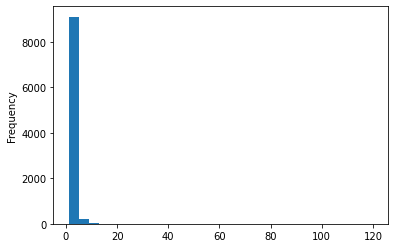

In [46]:
# Изобразим гистограмму, чтобы понимать, какое у нас распределение
df_num_of_emp['total_stuff'].plot(kind = 'hist', bins = 30)

In [47]:
# У нас распределение со слабым правым "хвостом", нужно подробнее изучить распределние, найдём медианное значение и куантили
q1 = df_num_of_emp['total_stuff'].quantile(0.25)
median = df_num_of_emp['total_stuff'].quantile(0.5)
q3 = df_num_of_emp['total_stuff'].quantile(0.75)
percetile_99 = df_num_of_emp['total_stuff'].quantile(0.99)

print(q1)
print(median)
print(q3)
print(percetile_99)

1.0
1.0
1.0
7.0


In [48]:
# Рассчитаем, когда количество работников в компании начинает превышать одного
x = float()
for x in range(1, 100, 1):
    x = x / 100
    if df_num_of_emp['total_stuff'].quantile(x) > 1:
        print(x)
        break
    else:
        pass

0.8


- Так, как можно видеть выше, у нас больше 3/4 (3 квантиль) всех стартапов стартапов имеют только одного сотрудника (CEO), в остальных же компаниях работает больше одного человека;
- Удалось выяснить, что наш набор данных является прекрасным примером правила Паретто: 80 на 20, потому что 80% стартапов имеют только одного человека, а остальные 20 - более одного.
- В существующей ситуации оптимальным вариантом представляется разделение стартапов на органиазации с одним руководиетелем в составе и организаци с более чем одним человеком в составе. 

In [49]:
# Создадим "корзины" и ярлыки
bins = [0, 1, 1000]
labels = ['Стартапер', 'Органиазация']

# Используем метод cut() для группировки по количеству сотрудников 
df_num_of_emp['category_of_company'] = pd.cut(df_num_of_emp['total_stuff'],
      bins = bins,
      labels = labels,
      right = True)

# Посчитаем количество компаний в каждой группе (просто интересно)
df_num_of_emp.groupby('category_of_company')['company_id'].count()

category_of_company
Стартапер       7399
Органиазация    1962
Name: company_id, dtype: int64

In [50]:
# Тепеь посчитаем среднюю долю сотрудников с информацией об образовании в компании (считать будем по медиане)
df_num_of_emp.groupby('category_of_company')['prop_of_educated'].mean().sort_values(ascending = False)

category_of_company
Органиазация    0.581335
Стартапер       0.540073
Name: prop_of_educated, dtype: float64

- Как можно видеть, среди 58% стартаперов уже имеют образование в то время, как среди стартапов (ораганизаций) немного чаще можно встретить людей без образования или с неоконченным образованием. Такая разница может быть связана с тем, что (1) для стартапов с большим количеством людей требуются не только "белые", но и "синие" воротнички, котороые будут входить в штат сотрудников и будут заниматься обслуживанием инфраструктуры, а также (2) с возможностью нанимать младших специалистов, которые ещё не получили полного образования, в качестве, например, стажёров.

In [51]:
df_educated_people.head()

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,is_education
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,True
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,True
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,True
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,True


In [52]:
# Посмотрим, как измениться щаполняемость столбцов при добавлении детализированной информации об образовании

# Объеденим датасеты df_educated_people и df_degrees 
df_educated_people_degree = pd.merge(
    df_educated_people,
    df_degrees,
    on = 'id',
    how='left'
)

# Выведем информацию о полученном массиве
df_educated_people_degree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                61839 non-null  int64         
 1   first_name        61835 non-null  object        
 2   last_name         61838 non-null  object        
 3   company_id        13572 non-null  float64       
 4   network_username  11265 non-null  object        
 5   person_id         61838 non-null  float64       
 6   instituition      61797 non-null  object        
 7   graduated_at      33867 non-null  datetime64[ns]
 8   is_education      61839 non-null  bool          
 9   object_id         61838 non-null  Int64         
 10  degree_type       55791 non-null  object        
 11  subject           46240 non-null  object        
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 5.8+ MB


In [53]:
# Избавимся от одного лишнего столбца
df_educated_people_degree = df_educated_people_degree.drop(columns = 'person_id')

In [54]:
df_educated_people_degree.head()

,id,first_name,last_name,company_id,network_username,instituition,graduated_at,is_education,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,University of Pennsylvania,1989-01-01,True,6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,Universidad Catolica del Uruguay,2006-01-01,True,938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,Golden Gate University,1999-01-01,True,13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,Cairo University,NaT,True,74038,MS,Applied Mathematics
4,100000,Sue,Pilsch,NaN,NaN,Ohio State University,NaT,True,89666,MS,Computer Science


In [55]:
# Проверим, возможно, у нас снова появились дубликаты
df_educated_people_degree.duplicated(subset = 'id').sum()

0

In [56]:
# У нас не оказалась дубликатов среди id, так что мы можем просто рассчитать долю пропусков
df_educated_people_degree.isna().mean().round(2).sort_values(ascending=False)*100

network_username    82.0
company_id          78.0
graduated_at        45.0
subject             25.0
degree_type         10.0
id                   0.0
first_name           0.0
last_name            0.0
instituition         0.0
is_education         0.0
object_id            0.0
dtype: float64

- Присоединив дополнительную информацию об образовании, мы почти никак не изменили точность наших данных, но мы смогли добавить ещё больше деталей, так что в дальнейшем можно будет изучить влияние MBA на получение финансирования и специфику образования при дальнейшем анализе, что позволит увеличить качество гипотез. 

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [57]:
# Посчитаем количество пропусков в среди названий компаний в социальных сетях

print(df_company_rounds['network_username'].isna().mean().round(2))
print(df_people['network_username'].isna().mean().round(2))

0.56
0.83


In [58]:
# 56% достаточно высокий результат: нам необходимо заранее избавиться от данных значений

df_company_rounds_pure = df_company_rounds.dropna(subset = ['network_username'])

# Также избавимся от строк с пропусками в массиве df_people

df_people = df_people.dropna(subset = ['network_username'])

In [59]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38867 entries, 6 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                38867 non-null  int64  
 1   first_name        38867 non-null  object 
 2   last_name         38867 non-null  object 
 3   company_id        17313 non-null  float64
 4   network_username  38867 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [60]:
# Посчитаем колчиество дубликатов, которые есть в столбце network_username

df_company_rounds_pure.duplicated(subset = 'network_username').mean().round(2)

0.17

In [61]:
# 63% данных по столбцу network_username дублируются либо имеют пропуски
# Такие случаи необходимо искоючить при дальнейшей работе

df_company_rounds_pure = df_company_rounds.drop_duplicates(subset = 'network_username')

# Выведем данные

df_company_rounds_pure.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
11,100062.0,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
12,100068.0,ChatRandom,games_video,operating,2011-02-01,NaT,chatrandom.com,chatrandom,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Попробуем произвести объединение данных отталкиваясь от network_username
df_merged = pd.merge(df_company_rounds_pure, df_people.drop(columns = 'company_id'), on = 'network_username', how = 'left')

# Выведем общую информацию о полученом массиве
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79643 entries, 0 to 79642
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           79643 non-null  float64       
 1   name                 79643 non-null  object        
 2   category_code        76666 non-null  object        
 3   status               79643 non-null  object        
 4   founded_at           63774 non-null  datetime64[ns]
 5   closed_at            1083 non-null   datetime64[ns]
 6   domain               79152 non-null  object        
 7   network_username     79642 non-null  object        
 8   country_code         54435 non-null  object        
 9   investment_rounds    79643 non-null  float64       
 10  funding_rounds       79643 non-null  float64       
 11  funding_total        79643 non-null  float64       
 12  milestones           79643 non-null  float64       
 13  funding_round_id     18827 non-

In [63]:
# Проанализируем количество пропусков, среди информации о пресонале, которые мы получили после объединения
df_merged.isna().mean().round(2).sort_values(ascending = False)

closed_at              0.99
last_name              0.97
first_name             0.97
id                     0.97
is_first_round         0.76
funded_at              0.76
company_id_rounds      0.76
funding_round_id       0.76
pre_money_valuation    0.76
participants           0.76
funding_round_type     0.76
is_last_round          0.76
raised_amount          0.76
country_code           0.32
founded_at             0.20
category_code          0.04
domain                 0.01
company_id             0.00
name                   0.00
funding_total          0.00
funding_rounds         0.00
investment_rounds      0.00
network_username       0.00
status                 0.00
milestones             0.00
dtype: float64

- Хорошо, массивы данных были успешно объеденены, однако, теперь возникает вопрос **"насколько эти данные соотносятся с тем, что мы получали ранее?"**. Чтобы ответить на данный вопрос, далее достаточно будет проанализировать численность сотрудников среди стартапов и сопоставить с прошлыми результатами. 

In [64]:
# Считаем, сколько человек работает в каждом стартапе
df_merged = df_merged[df_merged['id'].notna()]

df_merged.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,id,first_name,last_name
171,10221.0,Redphlag LLC,consulting,operating,2008-01-01,NaT,redphlag.com,gerardcorbett,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,17216.0,Gerard,Corbett
182,10243.0,Future Delivery,web,operating,2007-07-07,NaT,viralogy.com,yukaichou,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,17229.0,Yu-kai,Chou
205,102700.0,PATMADE Patentanwalt Kuehnel,legal,operating,2005-01-01,NaT,patmade.de,paberata,DEU,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,108985.0,Michael,Kuehnel
293,103556.0,TriVium Systems,software,operating,1996-01-01,NaT,triviumsystems.biz,triviumsys,USA,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109698.0,Ganesh,Krishnan
299,103681.0,BouliBrand Marketing,consulting,operating,2005-03-01,NaT,boulibrand.com,stroumboulis,NaN,0.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109189.0,Georgios,Stroumboulis


In [65]:
# Установим ещё пару нужных библиотек
!pip install matplotlib-venn

from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

     |████████████████████████████████| 40 kB 720 kB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=964618b74a0d061d6a1039cc5f32c6bd6209ac76dd783ec3dfc4e5fb3406da79
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


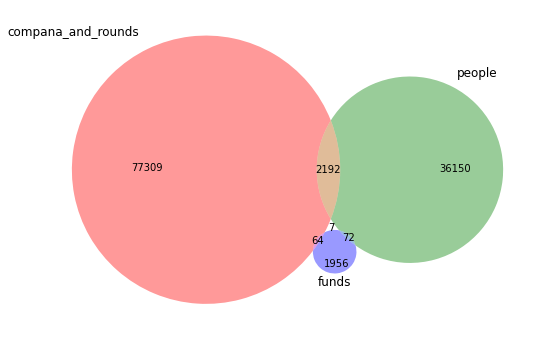

In [66]:
from matplotlib_venn import venn3

plt.figure(figsize = (10,6))

venn3(
    subsets=[set(df_company_rounds_pure['network_username']), 
             set(df_people['network_username']),
             set(df_funds['network_username'])],
    set_labels=('compana_and_rounds', 'people', 'funds')
)
plt.show()

- Объединение по полю network_username некорректно и не рекомендуется,  потому что поле не является общим идентификатором для разных датасетов (компании, сотрудники и фонды), что подтверждается:
    1. Минимальными пересечениями (<3%)
    2. Отсутствием тройного пересечения
    3. Высоким процентом уникальных значений в каждом наборе
- Оптимальнее будет использовать специализированные идентификаторы и таблицы связей для каждого типа отношений


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

- Данный файл был образован из двух файлов, **один из которых содержал информацию о компаниях, а второй - о раундах финансирования и инвестиций**, если у нас получится их разделить, то мы сможем по столбцу 'company_id' определить интересующую нас информацию о раундах финансирования конкретной компании;
- К **'df_rounds'** мы можем отнести столбцы 'company_id' (второй столбец), 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'participants', 'is_first_round', 'is_last_round', а к **'df_companies'** - оставшиеся столбцы. 

In [67]:
# Присвоим нужные столбцы новому df_rounds

# Первые 14 столбцов (индексы 0-13)
df_company = df_company_rounds.iloc[:, :14].copy()

# Оставшиеся 8 столбцов (индексы 14-21)
df_rounds = df_company_rounds.iloc[:, 14:].copy()

In [68]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
 13  funding_round_id   52928 non-null   float64 

In [69]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id_rounds    52928 non-null  float64       
 1   funded_at            52680 non-null  datetime64[ns]
 2   funding_round_type   52928 non-null  object        
 3   raised_amount        52928 non-null  float64       
 4   pre_money_valuation  52928 non-null  float64       
 5   participants         52928 non-null  float64       
 6   is_first_round       52928 non-null  float64       
 7   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.3+ MB


In [70]:
# Вместе с нужными даными мы перенесли большое колчиество пропусков, что неодходимо исправить
# Нам потребуется удалить строчки, где будут пропуски в столбце 'funding_round_id'

# Удаляем пропуски в столбце 'funding_round_id'
df_rounds = df_rounds.dropna(subset = ['company_id_rounds'])

# Удаляем дубликаты по столбцу 'funding_round_id'
df_rounds = df_rounds.drop_duplicates(subset = ['company_id_rounds', 'funded_at'])

# Выведем полученный результат
df_rounds.head()

,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0


In [71]:
# После обработки выделенного массива с раундами финансирования посмотри, какая доля пропусков в каждом из столбцов осталась
df_rounds.isna().mean().round(3).sort_values(ascending = False)

funded_at              0.005
company_id_rounds      0.000
funding_round_type     0.000
raised_amount          0.000
pre_money_valuation    0.000
participants           0.000
is_first_round         0.000
is_last_round          0.000
dtype: float64

In [72]:
# Теперь посмотрим, есть ли у нас явные дубликаты в данных df_company 
df_company.duplicated().sum()

0

In [73]:
# Хорошо, явных дубликатов не осталось, так что можно ничего не изменять
# Теперь посмотрим, сколько пропусков у нас осталось
df_company.isna().mean().sort_values(ascending = False)

closed_at            0.984162
funding_round_id     0.756959
network_username     0.561316
country_code         0.501286
founded_at           0.495091
category_code        0.339288
domain               0.324258
company_id           0.001387
name                 0.001387
status               0.001387
investment_rounds    0.001387
funding_rounds       0.001387
funding_total        0.001387
milestones           0.001387
dtype: float64

In [74]:
# Удалим строчки, где отсутсвтует company_id
df_company = df_company.dropna(subset = ['company_id'])

- Теперь крупный массив df_company_rounds разделён на два: df_company и df_rounds, в которых хранится общая информация о компаниях и общая информация о раундах интервью, соответсвенно;
- Данное разделение позволит нам напрямую обращаться к информации по раундам инвестирования в отдельную компанию и извлекать нужную информацию с меньшим количеством шагов, что делает дальнейшее исследование более удобным. 


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [75]:
# Составим условия для столбца status и для заполняемости funding_round и investment_rounds
df_company_rounds = df_company_rounds.loc[(df_company_rounds['status'] == 'acquired') |
                                          (df_company_rounds['funding_rounds'] > 0) | 
                                          (df_company_rounds['investment_rounds'] > 0)]

# Выведем инетерсующие нас столбцы, чтобы убедиться, что запрос работает корректно
df_company_rounds[['status', 'funding_rounds', 'investment_rounds']].head(10)

,status,funding_rounds,investment_rounds
0,operating,3.0,0.0
1,operating,3.0,0.0
2,operating,3.0,0.0
3,acquired,0.0,0.0
4,acquired,0.0,0.0
15,acquired,1.0,0.0
20,acquired,1.0,0.0
21,operating,5.0,0.0
22,operating,5.0,0.0
23,operating,5.0,0.0


In [76]:
# Хорошо, теперь нам надо проверить, сколько всего компаний есть в данном списке: 

count_unique = df_company_rounds['company_id'].nunique()
print(f'Количество компаний в полученом списке: {count_unique}')

Количество компаний в полученом списке: 40747


- Общее количество стартапов, подходящих под наши условия превышает 40 тыс., такой объём данных позволит сделать грамотное исследование и найти интересующие заказчика варианты для покупки.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [77]:
# Для начала найдём размер общего финансирования для одной компании, просуммирвоав значения по столбцу после группировки
data = df_company_rounds.groupby('company_id')['funding_total'].quantile(0.5).reset_index()

# Возьмём только те случаи, где финансирование реально было
data = data['funding_total'].loc[data['funding_total'] > 0]

data.head()

0    3.975000e+07
1    4.500000e+07
2    2.425700e+09
3    8.000000e+05
5    1.650000e+07
Name: funding_total, dtype: float64

In [78]:
# Посмотрим описательную статистику по массиву
data.describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Text(0.5, 0, 'Сумма финансирования (млн $)')

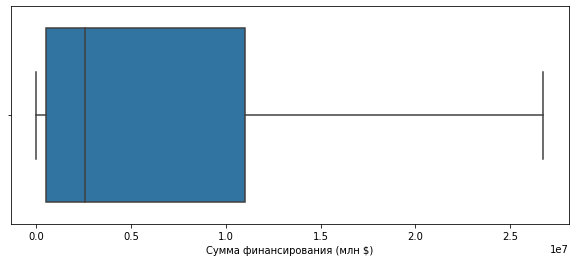

In [79]:
# data_zero = df_company_rounds.loc[df_company_rounds['funding_total'] != 0]
# Построим ящик с усами, но исключим при его построении выбросы, которые у нас есть (их достаточно много, поэтому с ними граф)

plt.figure(figsize = (10,4))

sns.boxplot(x = data,
            showfliers = False)

plt.xlabel('Сумма финансирования (млн $)')

- На ящике с усами видно, что распределение имеет **вытянутый правый "хвост"**, хотелось бы посмотреть, что нам покажет гистограмма

In [80]:
# А теперь рассчитаем, какие выбросы у нас действительно есть 

# Вычисляем Q1, Q3 и IQR
Q1 = np.quantile(data, 0.25)
Q3 = np.quantile(data, 0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
upper_outlier_threshold = Q3 + 1.5 * IQR
lower_outlier_threshold = Q1 - 1.5 * IQR

# Находим выбросы
outliers = data[(data < lower_outlier_threshold) | (data > upper_outlier_threshold)]

# Найдём минимальный выброс
upper_outlier_threshold

26750000.0

In [81]:
min(outliers)

26752200.0

- **Промежуточный вывод:** Как правило, компаниям выделяют финансирование, не превышающее **26,75 млн долларов**, все значения выше данной отметки будут относиться к выбросам, что неудивительно, потому что медианный показатель не превышает и трёх миллионов долларов (**2.6 млн долларов**).


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [82]:
df_company_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Для начала извлечём необходимые данные
df_one_zero_price = df_company_rounds[(((df_company_rounds['raised_amount'] == 1) |
                                     (df_company_rounds['raised_amount'] == 0)) &
                                     (df_company_rounds['funding_total'] > 0)) &
                                     (df_company_rounds['status'] == 'acquired')]

# Посмотрим, что у нас получилось
df_one_zero_price.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
208,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,...,2.0,38158.0,101312.0,2011-07-01,angel,0.0,0.0,1.0,0.0,1.0
1820,10795.0,Finjan,enterprise,acquired,1996-01-01,NaT,finjan.com,FinjanHoldings,USA,0.0,...,1.0,55974.0,10795.0,2013-11-25,venture,0.0,0.0,0.0,1.0,0.0
1933,1088.0,Tumblr,web,acquired,2007-02-01,NaT,tumblr.com,tumblr,USA,0.0,...,5.0,57269.0,1088.0,2012-01-01,other,0.0,0.0,1.0,1.0,0.0
1956,109.0,Mashery,enterprise,acquired,2006-05-01,NaT,mashery.com,Mashery,USA,0.0,...,4.0,1804.0,109.0,2007-01-01,angel,0.0,0.0,6.0,0.0,1.0
2813,11531.0,Right90,software,acquired,2003-01-01,NaT,right90.com,NaN,USA,0.0,...,1.0,46096.0,11531.0,2005-02-28,series-a,0.0,0.0,1.0,0.0,1.0


In [84]:
# Хорошо, ранее мы составили массив по компаниям, которые проходили процедуру продажи
# Теперь нам надо надо посчитать куантиль

data_zero = df_one_zero_price.groupby('company_id')['funding_total'].quantile(0.5).reset_index()['funding_total']

# Выведем полученный результат
data_zero.describe()

count    1.700000e+02
mean     1.958735e+07
std      3.010040e+07
min      1.200000e+04
25%      1.655000e+06
50%      8.057300e+06
75%      2.443750e+07
max      1.970000e+08
Name: funding_total, dtype: float64

Text(0.5, 0, 'Сумма финансирования (млн $)')

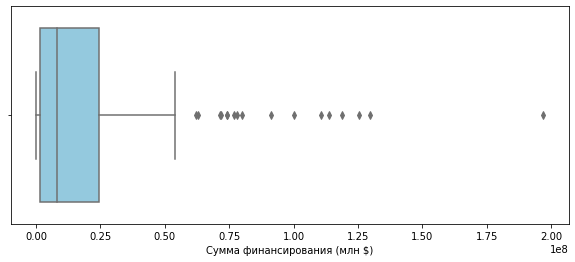

In [85]:
# Построим ящик с усами, но на этот раз не будем исключать выбросы, т.к. выборка небольшая, то визуализация будет читаемой

plt.figure(figsize = (10,4))

sns.boxplot(x = data_zero, 
            color = 'skyblue')

plt.xlabel('Сумма финансирования (млн $)')

In [86]:
# А теперь рассчитаем, какие выбросы у нас действительно есть 

# Вычисляем Q1, Q3 и IQR
Q1 = np.quantile(data_zero, 0.25)
Q3 = np.quantile(data_zero, 0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
upper_outlier_threshold = Q3 + 1.5 * IQR
lower_outlier_threshold = Q1 - 1.5 * IQR

# Находим выбросы
outliers_zero = data_zero[
    (data_zero < lower_outlier_threshold) | 
    (data_zero > upper_outlier_threshold)
]

# Найдём минимальный выброс
upper_outlier_threshold

58611250.0

In [87]:
# Сейчас понадобится импоритировать одну библиотеку 
from scipy.stats import percentileofscore

In [88]:
# Теперь оценим перцентиль, которому соответствует данная граница
percentileofscore(data_zero, 58611250)

90.0

- Как правило, компаниям выделяют финансирование, не превышающее **58,6 млн долларов** (это число больше чем 90% всех значений рассматривапемой выборки), все значения выше данной отметки будут относиться к выбросам, что неудивительно, потому что медианный показатель не превышает и 10 миллионов долларов (10 миллионов долларов).


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [89]:
# Для начала изучим, какие категории стартапов вообще есть
df_company_rounds['category_code'].unique()

array(['web', 'games_video', 'mobile', 'health', 'cleantech', 'analytics',
       nan, 'network_hosting', 'finance', 'education', 'medical',
       'manufacturing', 'biotech', 'enterprise', 'ecommerce', 'hardware',
       'software', 'advertising', 'news', 'government',
       'public_relations', 'other', 'security', 'photo_video', 'travel',
       'search', 'social', 'transportation', 'hospitality', 'sports',
       'nonprofit', 'fashion', 'messaging', 'music', 'consulting',
       'semiconductor', 'design', 'legal', 'real_estate', 'automotive',
       'nanotech', 'pets', 'local'], dtype=object)

In [90]:
# МАКСИМАЛЬНЫЕ ЦЕНЫ
# Хорошо, категорий достаточно много (если быть точным, 42), поэтому мы сфокусируем внимание на топ-15
df_price = df_company_rounds.groupby('category_code')['funding_total'].quantile(0.5).sort_values(ascending = False)
df_price_top = df_price.head(15)
df_price_top

category_code
nanotech           25000000.0
semiconductor      19930200.0
cleantech          15000000.0
medical            15000000.0
biotech            10127100.0
network_hosting     7655000.0
enterprise          7000000.0
security            6577230.0
automotive          5250000.0
advertising         5200000.0
analytics           5000000.0
transportation      4500000.0
manufacturing       4488440.0
finance             4015000.0
hardware            4000000.0
Name: funding_total, dtype: float64

<AxesSubplot:title={'center':'15 самых дорогих стартапов'}, xlabel='Категория стартапа', ylabel='Инвестиции'>

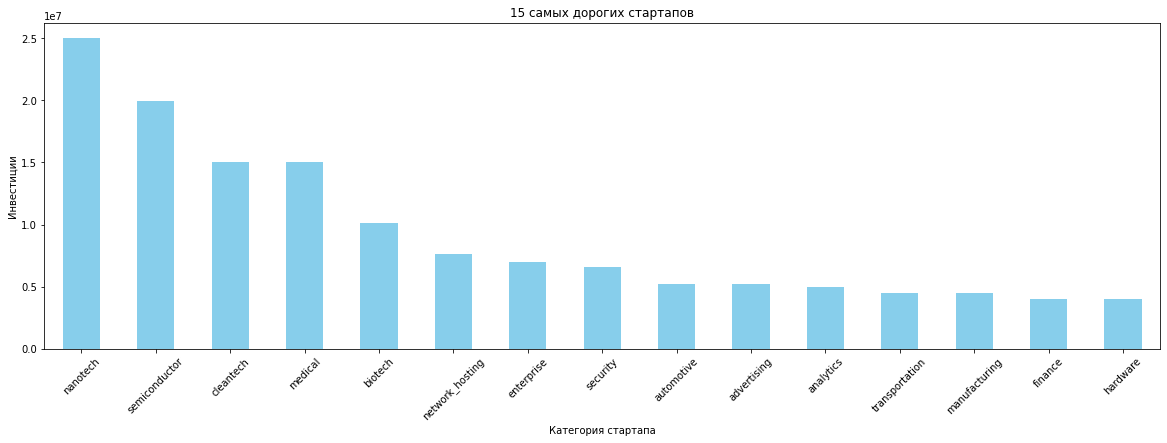

In [91]:
df_price_top.plot(kind = 'bar', 
                  color = 'skyblue',
                  rot = 45,
                  title = '15 самых дорогих стартапов',
                  ylabel = 'Инвестиции',
                  xlabel = 'Категория стартапа',
                  figsize = (20, 6))

In [92]:
# МАКСИМАЛЬНЫЙ РАЗБРОС
# Хорошо, категорий достаточно много, поэтому мы сфокусируем внимание на топ-15
df_std_price = df_company_rounds.groupby('category_code')['funding_total'].std().sort_values(ascending = False)
df_std_price_top = df_std_price.head(15)
df_std_price_top

category_code
automotive          3.772832e+08
social              2.783012e+08
manufacturing       2.200883e+08
mobile              2.073062e+08
nanotech            1.463266e+08
cleantech           1.403786e+08
transportation      9.155941e+07
health              9.054591e+07
news                8.684070e+07
ecommerce           8.345866e+07
travel              7.883577e+07
music               7.822000e+07
network_hosting     7.734072e+07
games_video         6.835634e+07
public_relations    6.683840e+07
Name: funding_total, dtype: float64

<AxesSubplot:title={'center':'15 самых дорогих стартапов'}, xlabel='Категория стартапа', ylabel='Инвестиции'>

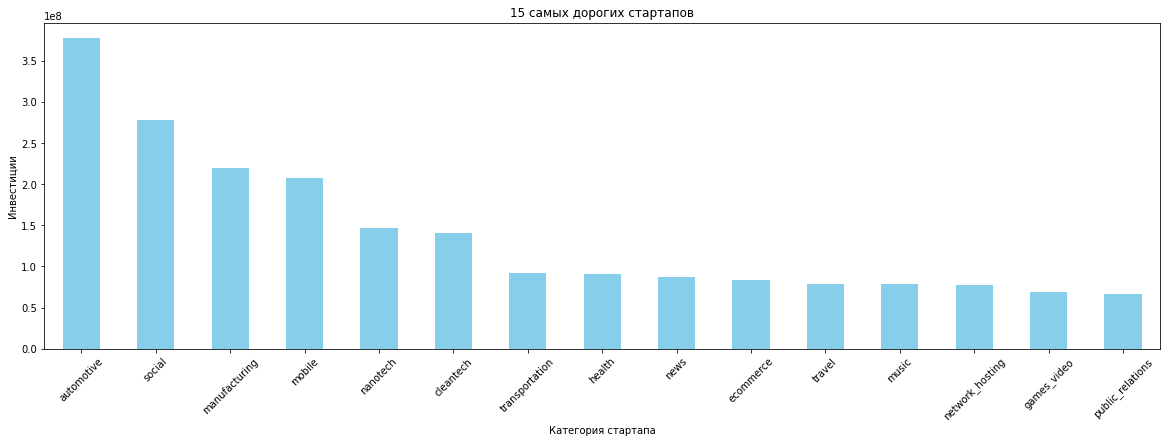

In [93]:
# Строим графи топ-15
df_std_price_top.plot(kind = 'bar', 
                  color = 'skyblue',
                  rot = 45,
                  title = '15 самых дорогих стартапов',
                  ylabel = 'Инвестиции',
                  xlabel = 'Категория стартапа',
                  figsize = (20, 6))

In [94]:
# Интересно, есть ли можно ли проследить какие-нибудь закономерности у данных покаазтелей

# Итак, для начала, составим общий массив, можно было бы сделать это занова через агригацию, но я упрощу себе задачу
df_corr = pd.merge(df_price.reset_index(), 
         df_std_price.reset_index(),
         on = 'category_code'
)

df_corr = df_corr.rename(columns = {'funding_total_x' : 'funding_meadian', 
                          'funding_total_y' : 'funding_std'})

df_corr.head(5)

,category_code,funding_meadian,funding_std
0,nanotech,25000000.0,1.463266e+08
1,semiconductor,19930200.0,4.881305e+07
2,cleantech,15000000.0,1.403786e+08
3,medical,15000000.0,4.523022e+07
4,biotech,10127100.0,6.066212e+07


<AxesSubplot:xlabel='funding_meadian', ylabel='funding_std'>

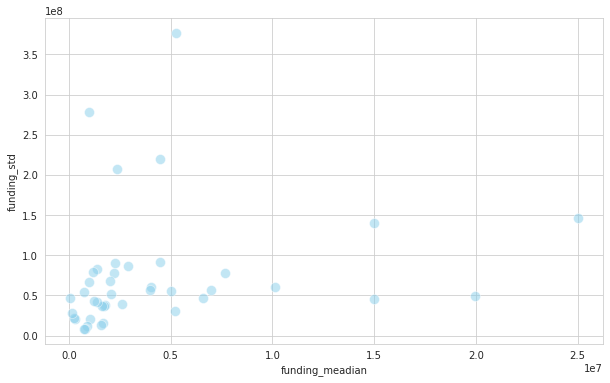

In [95]:
# Теперь составим scatterplot, чтобы посмотреть, какое у нас выходит распределение
plt.figure(figsize = (10,6))

sns.set_style('whitegrid')

sns.scatterplot(data = df_corr, 
                x = 'funding_meadian',
                y = 'funding_std',
                color = 'skyblue',
                s = 100,
                alpha = 0.5
)

In [96]:
# Понятнее не стало, поэтому я дополнительно разобью на группы 
classes_keywords = {
     'IT-технологии': ['web', 'games_video', 'mobile', 'analytics', 'network_hosting', 'enterprise', 
                       'ecommerce', 'hardware', 'software', 'advertising', 'photo_video', 'search', 
                       'messaging', 'semiconductor', 'design', 'security'],
     'Социальные проекты': ['health', 'education', 'medical', 'government', 'nonprofit', 'local', 'pets', 'social',
                            'hospitality', 'sports', 'travel', 'news', 'public_relations', 'transportation'],
     'Другое': ['finance',  'cleantech', 'manufacturing', 'biotech', 'consulting', 'legal', 'real_estate', 
                'automotive', 'nanotech', 'fashion', 'music', 'other']
}

# Функция классификации - ДОПИСАТЬ САМОМУ
def classify_startup(description):
    for key in classes_keywords:
        if description in classes_keywords[key]:
            return key

# Применяем к данным
df_corr['type'] = df_corr['category_code'].apply(classify_startup)

# Проверим, как всё распределилось
df_corr

,category_code,funding_meadian,funding_std,type
0,nanotech,25000000.0,1.463266e+08,Другое
1,semiconductor,19930200.0,4.881305e+07,IT-технологии
2,cleantech,15000000.0,1.403786e+08,Другое
3,medical,15000000.0,4.523022e+07,Социальные проекты
4,biotech,10127100.0,6.066212e+07,Другое
5,network_hosting,7655000.0,7.734072e+07,IT-технологии
6,enterprise,7000000.0,5.681967e+07,IT-технологии
7,security,6577230.0,4.636334e+07,IT-технологии
8,automotive,5250000.0,3.772832e+08,Другое
9,advertising,5200000.0,3.037738e+07,IT-технологии


<AxesSubplot:xlabel='funding_meadian', ylabel='funding_std'>

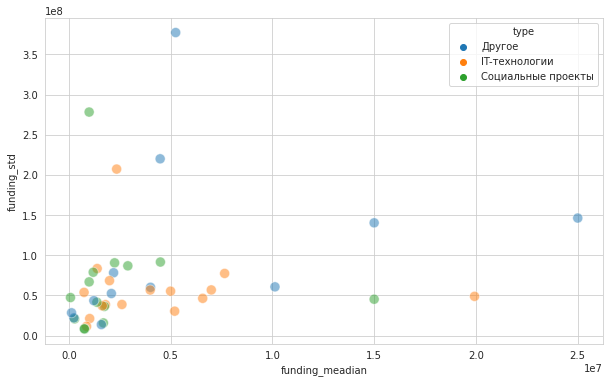

In [97]:
# Теперь составим scatterplot, чтобы посмотреть, какое у нас выходит распределение
plt.figure(figsize = (10, 6))

# Сделаем сетку удобной для чтения
sns.set_style('whitegrid')

# Построим scatterplot, на котором будут отображаться все типы
sns.scatterplot(data = df_corr, 
                x = 'funding_meadian',
                y = 'funding_std',
                alpha = 0.5,
                s = 100,
                hue = 'type'
)


- Как правило, стартапы, которые не относятся к IT-сфере и к социальной сфере имеют более высокий уровень **разброса и общей суммы финансирования**, однако прямой корреляции не видно ни в одной из групп категорий, ни во всех категориях; 
- Среди **самых дорогих дорогих** категорий стартапов можно выделить категории (1) нанотехнологий, (2) полупроводников и (3) очистительным технологиям, а среди технологий **с самым большим разбросом (среднеквадратичным отклонением)** можно выделить такие стартапы (1) для автоматизации процессов, (2) социально направленных и (3) производственных.  


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funding_rounds'>

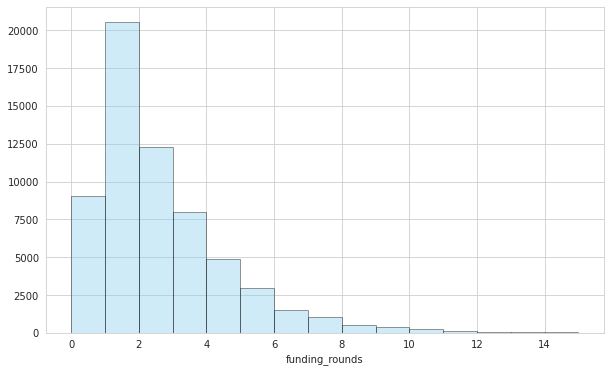

In [98]:
# Построим гистограму, чтобы оценить распределение и определить, с чем мы в дальнейшем будем работать: с медианой или средним арифметическим

# Настроим размеры графика
plt.figure(figsize = (10, 6))

# Используем seaborn
sns.distplot(df_company_rounds['funding_rounds'],
             kde = False,
             bins = 15,
             color = 'skyblue',
             hist_kws = {'edgecolor' : 'black'})

In [99]:
# Как можно выделить, на графике наблюдается ярко выраженная правосторонняя кривизна
# Поэтому для дальнейшей работы нам лучше использовать медианное значение, а не среднее арифметическое

# Постморим среднее количество раундов по статусам, но только в тех случаях, когда у нас количество раундов превышает ноль
df_company_rounds.loc[df_company_rounds['funding_rounds'] > 0].groupby('status')['funding_rounds'].quantile(0.5)

status
acquired     2.0
closed       1.0
ipo          4.0
operating    2.0
Name: funding_rounds, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa548b47d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa548ad2400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa548b479a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa548ad2ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa548ad2e20>],
 'means': []}

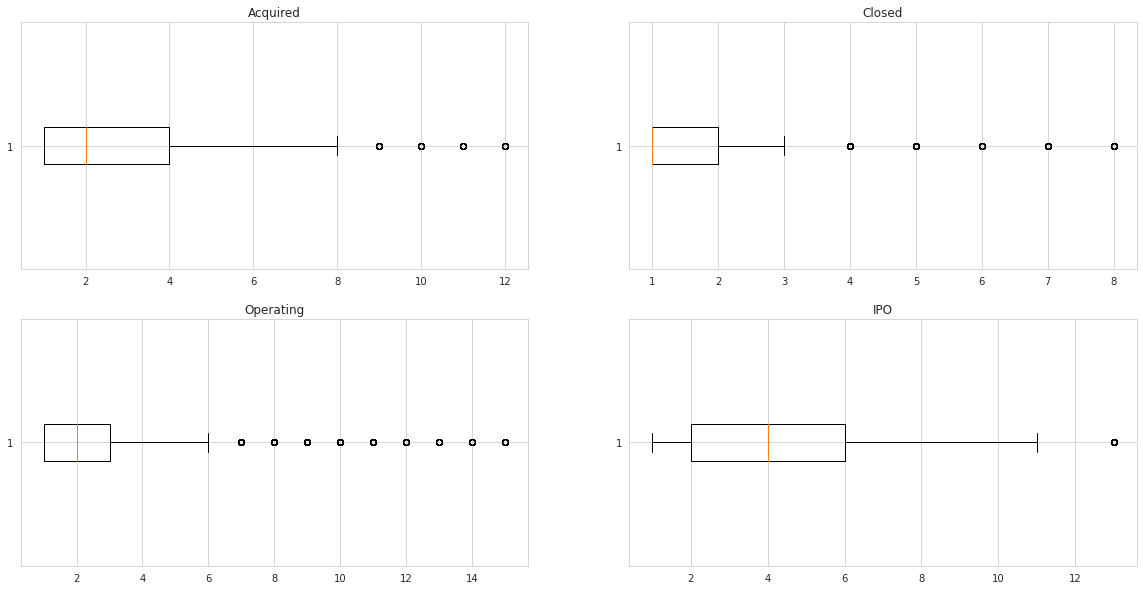

In [100]:
# Отобразим сразу несколько статусов
fig = plt.figure(figsize = (20, 10))

# Графики отобразим на одном холсте, чтобы было удобнее
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Теперь нарисуем несколько графиков и сравним их
ax1.set_title('Acquired')
ax1.boxplot(df_company_rounds['funding_rounds'].
            loc[(df_company_rounds['status'] == 'acquired') & (df_company_rounds['funding_rounds'] > 0)], vert = False)

ax2.set_title('Closed')
ax2.boxplot(df_company_rounds['funding_rounds'].
            loc[(df_company_rounds['status'] == 'closed') & (df_company_rounds['funding_rounds'] > 0)], vert = False)

ax3.set_title('Operating')
ax3.boxplot(df_company_rounds['funding_rounds'].
            loc[(df_company_rounds['status'] == 'operating')  & (df_company_rounds['funding_rounds'] > 0)], vert = False)

ax4.set_title('IPO')
ax4.boxplot(df_company_rounds['funding_rounds'].
            loc[(df_company_rounds['status'] == 'ipo')  & (df_company_rounds['funding_rounds'] > 0)], vert = False)

- **Закрытые стартапы ("Closed"):** в первую очередь хочется обратить внимание на эту категорию стартапов. Как и следовало ожиджидать, количество раундов финансирования у стартапов, которые были закрыты, в среднем, ниже, чем у дургих стартапов, ведь венчуры не заинтересованы анализируют привлекательность стартапов с финансовой точки зрения и не заинтересованы в поддержании невыгодных и убыточных проектов, у которых высокий риск закрытия, с этим связано **самое низкое медианное количество раундов - 1**;
- **Стартапы, которые вышли на рынок ценных бумаг ("IPO"):** это тоже одна из самых ярко выраженных категорий, потому что стартапы, у которых получилось сделать IPO (*Initial Public Offering*) являются самыми успешными стартапами, которые обладают достаточной финансовой дееспособностью и авторитетом в обществе из-за чего у этих компаний **самое высокое медианное количество раундов - 4**;
- **Действующие стартапы ("Operating") и проданные стартапы ("Acquired"):** эти две категории стартапов достаточно успешно осущетствляют свою деятельность и уже смогли подтвердить свою прибыльность, поэтому они могут получать финансирование от венчуров поэтому их **среднее медианное количество раундов - 2**


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

- ***Качество и подготовка данных***

    - Идентификаторы company_id / person_id заполнены полностью, объём выборки ≈ 40 000 компаний – этого достаточно для анализа.

    - Наибольшие пропуски: сведения о раундах (≈ 71%), связи people-company (≈ 85%), дата выпуска диплома (47%). Несмотря на это, ключевые поля целы, поэтому задачи решаемы после фильтрации.

    - Поле network_username показало < 3% пересечений и высокую уникальность – использовать его для объединения нельзя.

    - Исходный файл разделён на две таблицы: df_company (общие атрибуты компании) и df_rounds (все раунды). Связность по company_id сохранена, дубли устранены – дальнейший анализ стал проще и быстрее.

- ***Главные количественные результаты***

    - **Финансирование по годам:** средняя сумма раунда росла до 2006 г. (пик 5,5 млн долларов), затем падала до 2012 г., а число раундов одновременно увеличивалось (до ~10 000). Это отражает переход рынка к меньшим, но более частым инвестициям на фоне кризиса 2008 г.

    - **Типичная «нормальная» сумма, привлечённая компанией,** – медиана ≈ 10 млн долларов 90-й перцентиль равен 58,6 млн долларам, всё выше этой отметки считается выбросом.

    - **Образование персонала:** сведения имеются у 58% сотрудников малых компаний и у 54% – в более крупных, что может быть сдежсвием того, что одиночками-стартаперами чаще становяться люди без образования.

    - **Стоимость категорий стартапов:** самые дорогие – нанотехнологии, полупроводники, clean-tech; наибольший разброс цен наблюдается в автоматизации, социальных и производственных проектах. Вне IT- и social-ниши общий уровень и дисперсия финансирования выше.

    - **Связь статуса и числа раундов:** Closed – медиана 1, Operating/Acquired – 2, IPO – 4. Чем выше «финальный» статус, тем больше раундов нужно пройти. 

- ***Практические выводы***

    - Для быстрой ориентации инвестору достаточно ориентироваться на планку 60 млн долларов: всё выше требует отдельной проверки как потенциальный выброс.

    - **Если цель – высоко оценённые сделки**, стоит смотреть на nanotech, semiconductor и clean-tech; **если готовность к риску высока** – на сферы с большим разбросом (automation, social, manufacturing).

    - Компании с историей ≥ 4 раундов – основные кандидаты на IPO; ≤ 1 раунда – высокий риск закрытия.

    - При дальнейшем объединении данных используем только стабильные ключи (company_id, person_id); network_username оставляем как вспомогательный атрибут.

    - **Таким образом, даже при существенных пропусках подготовленный набор данных позволяет надёжно описать рынок стартап-финансирования, выделить типичные объёмы инвестиций, рисковые и премиальные категории, а также связь между жизненным циклом компании и числом раундов.**

